<a href="https://colab.research.google.com/github/Navya-89/Human_motion_analysis/blob/main/human_motion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All the required modules for the task are imported 
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 

# Task1

In [ ]:
# upload the required files 
## *** the files have been renamed with prefix 'si_' where i is the subject number for interpretation ***
from google.colab import files
uploaded = files.upload()

Saving s1_acc_climbingdown_chest.csv to s1_acc_climbingdown_chest.csv
Saving s1_acc_climbingdown_head.csv to s1_acc_climbingdown_head.csv
Saving s1_acc_climbingup_chest.csv to s1_acc_climbingup_chest.csv
Saving s1_acc_climbingup_head.csv to s1_acc_climbingup_head.csv
Saving s1_acc_running_chest.csv to s1_acc_running_chest.csv
Saving s1_acc_running_head.csv to s1_acc_running_head.csv
Saving s1_acc_walking_chest.csv to s1_acc_walking_chest.csv
Saving s1_acc_walking_head.csv to s1_acc_walking_head.csv
Saving s2_acc_climbingdown_chest.csv to s2_acc_climbingdown_chest.csv
Saving s2_acc_climbingdown_head.csv to s2_acc_climbingdown_head.csv
Saving s2_acc_climbingup_chest.csv to s2_acc_climbingup_chest.csv
Saving s2_acc_climbingup_head.csv to s2_acc_climbingup_head.csv
Saving s2_acc_running_chest.csv to s2_acc_running_chest.csv
Saving s2_acc_running_head.csv to s2_acc_running_head.csv
Saving s2_acc_walking_chest.csv to s2_acc_walking_chest.csv
Saving s2_acc_walking_head.csv to s2_acc_walking_h

In [ ]:
# All the required libraries are installed 
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 
  Created wheel for cairocffi: filename=cairocff

In [ ]:
# Visibility Graph modules imported
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
vg = [NaturalVG(), HorizontalVG()]

In [ ]:
# A list representing the subject number
subjects = []
for i in range(1,16):
  s = 's' + str(i) + '_'
  subjects.append(s)

In [ ]:
# A function to rename the file
def rename_file(x):
  source = os.listdir()
# To iterate for different activities at head and chest
  for s in source:
    if s[1:3] not in ['10','11','12','13','14','15']:
      if s.startswith(x):
          src = s
          dest = s[3::] 
          os.rename(src, dest)
    else:
      if s.startswith(x):
          src = s
          dest = s[4::]
          os.rename(src,dest)      

In [ ]:
# A function to rename the file back 
def rename_back(x):
  source = os.listdir()
  count = 0
# To iterate for different activities at head and chest
  for s in source:
    if (count<9):
        if s.startswith('acc'):
          src = s
          dest = x + s
          os.rename(src, dest)
          count = count + 1

In [ ]:
# To read the files for different activities for a subject for sensor at chest
def read_files():
  walking_chest = pd.read_csv('acc_walking_chest.csv')
  running_chest = pd.read_csv('acc_running_chest.csv')
  climbup_chest = pd.read_csv('acc_climbingup_chest.csv')
  climbdown_chest = pd.read_csv('acc_climbingdown_chest.csv') 
  global chest
  chest = [walking_chest, running_chest, climbup_chest, climbdown_chest]

# To read the files for different activities for a subject for sensor at head
  walking_head = pd.read_csv('acc_walking_head.csv')
  running_head = pd.read_csv('acc_running_head.csv')
  climbup_head = pd.read_csv('acc_climbingup_head.csv')
  climbdown_head = pd.read_csv('acc_climbingdown_head.csv')
  global head 
  head = [walking_head, running_head, climbup_head, climbdown_head]

labels_activity = ["walking", "running", "climbingup", "climbingdown"] # The activities considered


## 2. Applyting HVG and NVG. Computing the metrics

In [ ]:
# HVG and NVG for chest data
def visibility_graph_chest(vg,output_chest,subject):
  for k in range(0,2):
    g = vg[k]
    for c,i in enumerate(chest):
      for j in range(2,5):
        output_chest['Activity'].append(labels_activity[c])
        output_chest['Accelerometer_axis'].append(i.columns[j])
        g.build(i.iloc[1000:2024,j])
        ig_g = g.as_igraph()
        output_chest['Average_Degree'].append(np.mean(ig_g.degree()))
        output_chest['Average_Path_Length'].append(ig_g.average_path_length())
        output_chest['Network_Diameter'].append(ig_g.diameter())
        if k == 0: output_chest['Method'].append('NVG')
        else: output_chest['Method'].append('HVG')
        if subject[1:3] not in ['10','11','12','13','14','15']:
          sub = int(subject[1])
          output_chest['Subject'].append(sub)
        else: 
          sub = int(subject[1:3])
          output_chest['Subject'].append(sub)
    return output_chest 

In [ ]:
# HVG and NVG for head data
def visibility_graph_head(vg,output_head,subject):
  for k in range(0,2):
    g = vg[k]
    for c,i in enumerate(head): 
      for j in range(2,5):
        output_head['Activity'].append(labels_activity[c])
        output_head['Accelerometer_axis'].append(i.columns[j])
        g.build(i.iloc[1000:2024,j])
        ig_g = g.as_igraph()
        output_head['Average_Degree'].append(np.mean(ig_g.degree()))
        output_head['Average_Path_Length'].append(ig_g.average_path_length())
        output_head['Network_Diameter'].append(ig_g.diameter())
        if k == 0: output_head['Method'].append('NVG')
        else: output_head['Method'].append('HVG')
        if subject[1:3] not in ['10','11','12','13','14','15']:
          sub = int(subject[1])
          output_head['Subject'].append(sub)
        else: 
          sub = int(subject[1:3])
          output_head['Subject'].append(sub)
    return output_head

## 3. Tabulating the results

In [ ]:
# Computing the metrics 
output_chest = {'Method': [], 'Subject': [], 'Accelerometer_axis': [], 'Average_Degree':[], 'Network_Diameter':[], 'Average_Path_Length':[], 'Activity': []}
output_head = {'Method': [], 'Subject': [], 'Accelerometer_axis': [], 'Average_Degree':[], 'Network_Diameter':[], 'Average_Path_Length':[], 'Activity': []}
for subject in subjects:
  rename_file(subject)
  read_files()
  visibility_graph_chest(vg,output_chest,subject)
  visibility_graph_head(vg,output_head,subject)
  rename_back(subject)
  

In [ ]:
# Tabulating the results for chest data
df_chest = pd.DataFrame(data = output_chest)
df_chest

,Method,Subject,Accelerometer_axis,Average_Degree,Network_Diameter,Average_Path_Length,Activity
0,NVG,1,attr_x,11.451172,10,4.441492,walking
1,NVG,1,attr_y,11.986328,9,4.241050,walking
2,NVG,1,attr_z,8.570312,10,4.897722,walking
3,NVG,1,attr_x,8.414062,9,4.307645,running
4,NVG,1,attr_y,11.136719,82,28.651949,running
...,...,...,...,...,...,...,...
175,NVG,15,attr_y,13.744141,11,5.264697,climbingup
176,NVG,15,attr_z,10.123047,10,4.766421,climbingup
177,NVG,15,attr_x,11.130859,11,5.427627,climbingdown
178,NVG,15,attr_y,14.156250,15,5.840334,climbingdown


In [ ]:
# Tabulating the results for head data
df_head = pd.DataFrame(data = output_head)
df_head

,Method,Subject,Accelerometer_axis,Average_Degree,Network_Diameter,Average_Path_Length,Activity
0,NVG,1,attr_x,12.492188,11,4.518703,walking
1,NVG,1,attr_y,13.187500,9,4.281492,walking
2,NVG,1,attr_z,12.974609,13,5.146120,walking
3,NVG,1,attr_x,9.601562,9,4.617489,running
4,NVG,1,attr_y,9.013672,9,4.969256,running
...,...,...,...,...,...,...,...
175,NVG,15,attr_y,18.816406,9,4.386371,climbingup
176,NVG,15,attr_z,12.654297,9,4.601635,climbingup
177,NVG,15,attr_x,8.044922,10,5.092977,climbingdown
178,NVG,15,attr_y,14.203125,11,4.388028,climbingdown


## Scatter plots for running and walking 

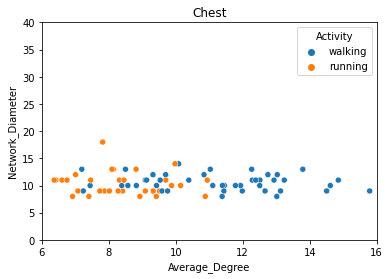

In [ ]:
df_chest_rw = df_chest.loc[(df_chest['Activity'] == 'walking') | (df_chest['Activity'] == 'running')]
sns.scatterplot(data= df_chest_rw, x="Average_Degree", y="Network_Diameter", hue="Activity")
plt.ylim(0, 40)
plt.xlim(6, 16)
plt.title('Chest')
plt.show()

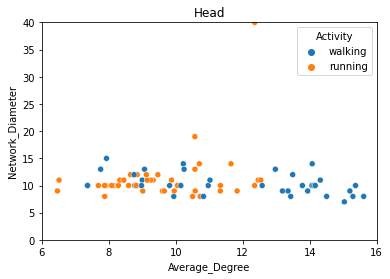

In [ ]:
df_head_rw = df_head.loc[(df_head['Activity'] == 'walking') | (df_head['Activity'] == 'running')]
sns.scatterplot(data= df_head_rw, x="Average_Degree", y="Network_Diameter", hue="Activity")
plt.ylim(0, 40)
plt.xlim(6, 16)
plt.title('Head')
plt.show()

## 5. Scatter plots for climbing up and down 

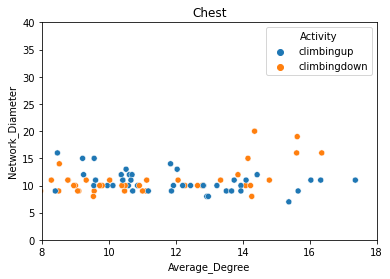

In [ ]:
df_chest_ud = df_chest.loc[(df_chest['Activity'] == 'climbingup') | (df_chest['Activity'] == 'climbingdown')]
sns.scatterplot(data= df_chest_ud, x="Average_Degree", y="Network_Diameter", hue="Activity")
plt.ylim(0, 40)
plt.xlim(8, 18)
plt.title('Chest')
plt.show()

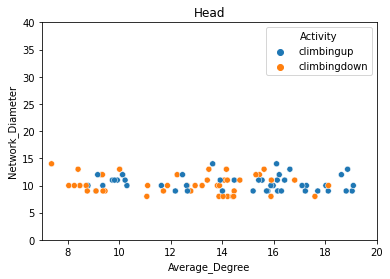

In [ ]:
df_head_ud = df_head.loc[(df_head['Activity'] == 'climbingup') | (df_head['Activity'] == 'climbingdown')]
sns.scatterplot(data= df_head_ud, x="Average_Degree", y="Network_Diameter", hue="Activity")
plt.ylim(0, 40)
plt.xlim(7, 20)
plt.title('Head')
plt.show()

## time_series

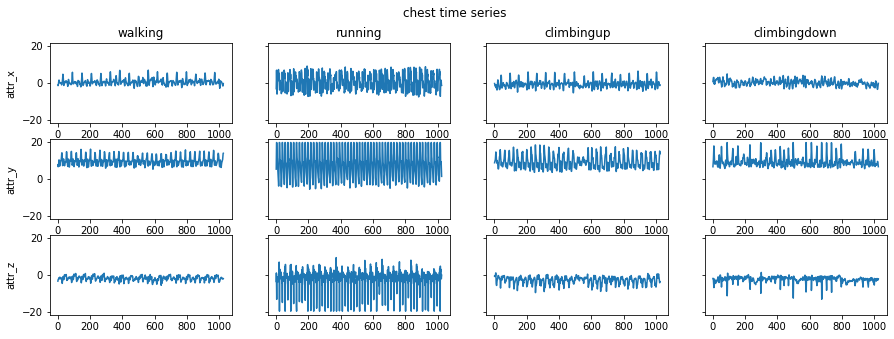

In [ ]:
# Plotting the time series data when sensor is attached to chest
fig, axes = plt.subplots(3, 4, figsize=(15, 5), sharey=True)
fig.suptitle('chest time series')
for c,i in enumerate(chest): 
  sns.lineplot(ax= axes[0][c], x=range(1, len(i['attr_x'][1000:2024])+1), y=i['attr_x'][1000:2024])
  sns.lineplot(ax= axes[1][c], x=range(1, len(i['attr_y'][1000:2024])+1), y=i['attr_y'][1000:2024])
  sns.lineplot(ax= axes[2][c], x=range(1, len(i['attr_z'][1000:2024])+1), y=i['attr_z'][1000:2024])
cols = ['{}'.format(col) for col in labels_activity ]
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

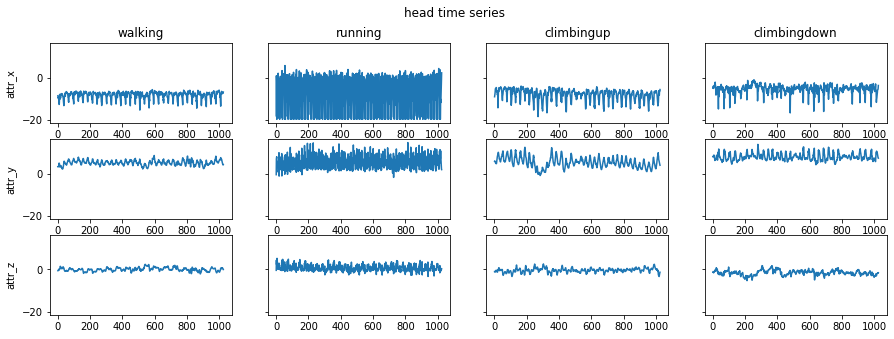

In [ ]:
# Plotting the time series data when sensor is attached to head
fig, axes = plt.subplots(3, 4, figsize=(15, 5), sharey=True)
fig.suptitle('head time series')
for c,i in enumerate(head): 
  sns.lineplot(ax= axes[0][c], x=range(1, len(i['attr_x'][1000:2024])+1), y=i['attr_x'][1000:2024])
  sns.lineplot(ax= axes[1][c], x=range(1, len(i['attr_y'][1000:2024])+1), y=i['attr_y'][1000:2024])
  sns.lineplot(ax= axes[2][c], x=range(1, len(i['attr_z'][1000:2024])+1), y=i['attr_z'][1000:2024])
cols = ['{}'.format(col) for col in labels_activity ]
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

# Task2

#### For Head

In [ ]:
# data labels
running = ['Running-Head-1','Running-Head-2','Running-Head-3','Running-Head-4','Running-Head-5','Running-Head-6','Running-Head-7','Running-Head-8','Running-Head-9','Running-Head-10','Running-Head-11','Running-Head-12','Running-Head-13','Running-Head-14','Running-Head-15']
walking = ['Walking-Head-1','Walking-Head-2','Walking-Head-3','Walking-Head-4','Walking-Head-5','Walking-Head-6','Walking-Head-7','Walking-Head-8','Walking-Head-9','Walking-Head-10','Walking-Head-11','Walking-Head-12','Walking-Head-13','Walking-Head-14','Walking-Head-15']
climbingup = ['ClimbingUp-Head-1','ClimbingUp-Head-2','ClimbingUp-Head-3','ClimbingUp-Head-4','ClimbingUp-Head-5','ClimbingUp-Head-6','ClimbingUp-Head-7','ClimbingUp-Head-8','ClimbingUp-Head-9','ClimbingUp-Head-10','ClimbingUp-Head-11','ClimbingUp-Head-12','ClimbingUp-Head-13','ClimbingUp-Head-14','ClimbingUp-Head-15']
climbingdown = ['ClimbingDown-Head-1','ClimbingDown-Head-2','ClimbingDown-Head-3','ClimbingDown-Head-4','ClimbingDown-Head-5','ClimbingDown-Head-6','ClimbingDown-Head-7','ClimbingDown-Head-8','ClimbingDown-Head-9','ClimbingDown-Head-10','ClimbingDown-Head-11','ClimbingDown-Head-12','ClimbingDown-Head-13','ClimbingDown-Head-14','ClimbingDown-Head-15']

In [ ]:
running_df = []
walking_df = []
climbingup_df = []
climbingdown_df = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for i in range(len(running)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ running[i] +".csv")
    running_df.append(dataframe.iloc[:, 1:5])

for i in range(len(walking)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ walking[i] +".csv")
    walking_df.append(dataframe.iloc[:, 1:5])

for i in range(len(climbingup)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ climbingup[i] +".csv")
    climbingup_df.append(dataframe.iloc[:, 1:5])

for i in range(len(climbingdown)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ climbingdown[i] +".csv")
    climbingdown_df.append(dataframe.iloc[:, 1:5])

In [ ]:
def s_entropy(f_lst):
    f_lst = [ele for ele in f_lst if ele != 0]
    sh_entropy = 0.0
    for freq in f_lst:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
     
def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    pe = p_entropy(op)
    c1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    c2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    c3 = 0.5*np.log(len(op))
    Q_o = -1/(c1+c2+c3)

    t_op_p = np.divide(op, sum(op))
    t_op_p2 = (0.5*t_op_p)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(t_op_p2) - 0.5 * s_entropy(t_op_p) - 0.5 * np.log(len(op)))
    cjs = Q_o * JSdivergence * pe
    return(cjs)

In [ ]:
xyz = ['x', 'y', 'z']
Signal_Length = [1024,2048,4096]
Embedded_Dimensions =  [3,4,5,6]
Embedded_Delay = [1,2,3]
# given Values

In [ ]:
running_dfp = []
walking_dfp = []
climbingup_dfp = []
climbingdown_dfp = []
# empty arrays

In [ ]:
# running

def pe_comp_running(df, axis, signal_length, dimension, delay):
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:
          entropy, complexity_result = pe_comp_running(running_df[i], axis, signal_lengths, dimensions, delays)
          running_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Running'))

running_dfp = pd.DataFrame(running_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
running_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.768726,0.163147,Running
1,1,x,1024,3,2,0.817092,0.140836,Running
2,1,x,1024,3,3,0.850953,0.120502,Running
3,1,x,1024,4,1,0.695177,0.219948,Running
4,1,x,1024,4,2,0.752342,0.208434,Running
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.940730,0.097644,Running
1616,15,z,4096,5,3,0.936535,0.103821,Running
1617,15,z,4096,6,1,0.911032,0.152019,Running
1618,15,z,4096,6,2,0.924424,0.150972,Running


In [ ]:
def pe_comp_walking(df, axis, signal_length, dimension, delay):
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:
          entropy, complexity_result = pe_comp_walking(walking_df[i], axis, signal_lengths, dimensions, delays)
          walking_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Walking'))

walking_dfp = pd.DataFrame(walking_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
walking_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.774977,0.171488,Walking
1,1,x,1024,3,2,0.879752,0.101534,Walking
2,1,x,1024,3,3,0.944077,0.049994,Walking
3,1,x,1024,4,1,0.692266,0.239495,Walking
4,1,x,1024,4,2,0.827405,0.178456,Walking
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.816170,0.233151,Walking
1616,15,z,4096,5,3,0.888188,0.164760,Walking
1617,15,z,4096,6,1,0.759272,0.275048,Walking
1618,15,z,4096,6,2,0.834523,0.251810,Walking


In [ ]:
def pe_comp_climbingup(df, axis, signal_length, dimension, delay):
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:
          entropy, complexity_result = pe_comp_climbingup(climbingup_df[i], axis, signal_lengths, dimensions, delays)
          climbingup_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Climbing Up'))

climbingup_dfp = pd.DataFrame(climbingup_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
climbingup_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.841669,0.128576,Climbing Up
1,1,x,1024,3,2,0.910510,0.077581,Climbing Up
2,1,x,1024,3,3,0.941408,0.051931,Climbing Up
3,1,x,1024,4,1,0.770947,0.200852,Climbing Up
4,1,x,1024,4,2,0.866238,0.141244,Climbing Up
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.819446,0.228439,Climbing Up
1616,15,z,4096,5,3,0.871673,0.187592,Climbing Up
1617,15,z,4096,6,1,0.756672,0.278420,Climbing Up
1618,15,z,4096,6,2,0.838220,0.245496,Climbing Up


In [ ]:
def pe_comp_climbingdown(df, axis, signal_length, dimension, delay):
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:

          entropy, complexity_result = pe_comp_climbingdown(climbingdown_df[i], axis, signal_lengths, dimensions, delays)
          climbingdown_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Climbing Down'))

climbingdown_dfp = pd.DataFrame(climbingdown_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
climbingdown_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.861552,0.115472,Climbing Down
1,1,x,1024,3,2,0.947753,0.047426,Climbing Down
2,1,x,1024,3,3,0.976136,0.022251,Climbing Down
3,1,x,1024,4,1,0.804610,0.184096,Climbing Down
4,1,x,1024,4,2,0.913786,0.102522,Climbing Down
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.915038,0.123574,Climbing Down
1616,15,z,4096,5,3,0.926510,0.112552,Climbing Down
1617,15,z,4096,6,1,0.874243,0.193731,Climbing Down
1618,15,z,4096,6,2,0.905553,0.170945,Climbing Down


In [ ]:
list_dataframes_walking_running =[running_dfp,walking_dfp]
dataframe_walking_running=pd.concat(list_dataframes_walking_running).reset_index(drop=True)
dataframe_walking_running=dataframe_walking_running[dataframe_walking_running['Signal Length']==4096]
dataframe_walking_running=dataframe_walking_running[dataframe_walking_running['Delay']==1]

import plotly.express as px
fig = px.scatter(dataframe_walking_running, x="Complexity", y="Permutation Entropy", color="Activity", facet_col="Dimension", facet_row="Accelerometer axis")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [ ]:
list_dataframes_climbingup_climbingdown =[climbingup_dfp,climbingdown_dfp]
dataframe_climbingup_climbingdown=pd.concat(list_dataframes_climbingup_climbingdown).reset_index(drop=True)
dataframe_climbingup_climbingdown=dataframe_climbingup_climbingdown[dataframe_climbingup_climbingdown['Signal Length']==4096]
dataframe_climbingup_climbingdown=dataframe_climbingup_climbingdown[dataframe_climbingup_climbingdown['Delay']==1]

import plotly.express as px
fig = px.scatter(dataframe_climbingup_climbingdown, x="Complexity", y="Permutation Entropy", color="Activity", facet_col="Dimension", facet_row="Accelerometer axis")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

#### For Chest

In [ ]:
running_list = ['Acc-Running-Chest-Sub1','Acc-Running-Chest-Sub2','Acc-Running-Chest-Sub3','Acc-Running-Chest-Sub4','Acc-Running-Chest-Sub5','Acc-Running-Chest-Sub6','Acc-Running-Chest-Sub7','Acc-Running-Chest-Sub8','Acc-Running-Chest-Sub9','Acc-Running-Chest-Sub10','Acc-Running-Chest-Sub11','Acc-Running-Chest-Sub12','Acc-Running-Chest-Sub13','Acc-Running-Chest-Sub14','Acc-Running-Chest-Sub15']
walking_list = ['Acc-Walking-Chest-Sub1','Acc-Walking-Chest-Sub2','Acc-Walking-Chest-Sub3','Acc-Walking-Chest-Sub4','Acc-Walking-Head-Sub5','Acc-Walking-Head-Sub6','Acc-Walking-Head-Sub7','Acc-Walking-Head-Sub8','Acc-Walking-Head-Sub9','Acc-Walking-Chest-Sub10','Acc-Walking-Chest-Sub11','Acc-Walking-Chest-Sub12','Acc-Walking-Chest-Sub13','Acc-Walking-Chest-Sub14','Acc-Walking-Chest-Sub15']

climbingup_list = ['Acc-ClimbingUp-Chest-Sub1','Acc-ClimbingUp-Chest-Sub2','Acc-ClimbingUp-Chest-Sub3','Acc-ClimbingUp-Chest-Sub4','Acc-ClimbingUp-Chest-Sub5','Acc-ClimbingUp-Chest-Sub6','Acc-ClimbingUp-Chest-Sub7','Acc-ClimbingUp-Chest-Sub8','Acc-ClimbingUp-Chest-Sub9','Acc-ClimbingUp-Chest-Sub10','Acc-ClimbingUp-Chest-Sub11','Acc-ClimbingUp-Chest-Sub12','Acc-ClimbingUp-Chest-Sub13','Acc-ClimbingUp-Chest-Sub14','Acc-ClimbingUp-Chest-Sub15']
climbingdown_list = ['Acc-ClimbingDown-Chest-Sub1','Acc-ClimbingDown-Chest-Sub2','Acc-ClimbingDown-Chest-Sub3','Acc-ClimbingDown-Chest-Sub4','Acc-ClimbingDown-Chest-Sub5','Acc-ClimbingDown-Chest-Sub6','Acc-ClimbingDown-Chest-Sub7','Acc-ClimbingDown-Chest-Sub8','Acc-ClimbingDown-Chest-Sub9','Acc-ClimbingDown-Chest-Sub10','Acc-ClimbingDown-Chest-Sub11','Acc-ClimbingDown-Chest-Sub12','Acc-ClimbingDown-Chest-Sub13','Acc-ClimbingDown-Chest-Sub14','Acc-ClimbingDown-Chest-Sub15']

In [ ]:
running_dataframes = []
walking_dataframes = []

climbingup_dataframes = []
climbingdown_dataframes = []

In [ ]:
for i in range(len(running)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ running[i] +".csv")
    running_df.append(dataframe.iloc[:, 1:5])

for i in range(len(walking)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ walking[i] +".csv")
    walking_df.append(dataframe.iloc[:, 1:5])

for i in range(len(climbingup)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ climbingup[i] +".csv")
    climbingup_df.append(dataframe.iloc[:, 1:5])

for i in range(len(climbingdown)):
    dataframe = pd.read_csv("/content/drive/MyDrive/fdaproject2_data/"+ climbingdown[i] +".csv")
    climbingdown_df.append(dataframe.iloc[:, 1:5])

In [ ]:
# Having all our varying parameters and three axis in seperate list.

xyz = ['x', 'y', 'z']
Signal_Length = [1024,2048,4096]
Embedded_Dimensions =  [3,4,5,6]
Embedded_Delay = [1,2,3]

In [ ]:
# Intiallizing Empty Array for the four activities.

running_dfp = []
walking_dfp = []
climbingup_dfp = []
climbingdown_dfp = []

In [ ]:
# Creating a function to vary all the parameters for the 'Running' Activity for all subjects.

def pe_comp_running(df, axis, signal_length, dimension, delay):
  # attr_axis
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:

          entropy, complexity_result = pe_comp_running(running_df[i], axis, signal_lengths, dimensions, delays)
          running_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Running'))

# Converting the Array into a Dataframe.
running_dfp = pd.DataFrame(running_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
running_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.768726,0.163147,Running
1,1,x,1024,3,2,0.817092,0.140836,Running
2,1,x,1024,3,3,0.850953,0.120502,Running
3,1,x,1024,4,1,0.695177,0.219948,Running
4,1,x,1024,4,2,0.752342,0.208434,Running
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.940730,0.097644,Running
1616,15,z,4096,5,3,0.936535,0.103821,Running
1617,15,z,4096,6,1,0.911032,0.152019,Running
1618,15,z,4096,6,2,0.924424,0.150972,Running


In [ ]:
def pe_comp_walking(df, axis, signal_length, dimension, delay):
  # attr_axis
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:

          entropy, complexity_result = pe_comp_walking(walking_df[i], axis, signal_lengths, dimensions, delays)
          walking_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Walking'))

# Converting the Array into a Dataframe.
walking_dfp = pd.DataFrame(walking_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
walking_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.774977,0.171488,Walking
1,1,x,1024,3,2,0.879752,0.101534,Walking
2,1,x,1024,3,3,0.944077,0.049994,Walking
3,1,x,1024,4,1,0.692266,0.239495,Walking
4,1,x,1024,4,2,0.827405,0.178456,Walking
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.816170,0.233151,Walking
1616,15,z,4096,5,3,0.888188,0.164760,Walking
1617,15,z,4096,6,1,0.759272,0.275048,Walking
1618,15,z,4096,6,2,0.834523,0.251810,Walking


In [ ]:
def pe_comp_climbingup(df, axis, signal_length, dimension, delay):
  # attr_axis
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:

          entropy, complexity_result = pe_comp_climbingup(climbingup_df[i], axis, signal_lengths, dimensions, delays)
          climbingup_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Climbing Up'))

# Converting the Array into a Dataframe.
climbingup_dfp = pd.DataFrame(climbingup_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
climbingup_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.841669,0.128576,Climbing Up
1,1,x,1024,3,2,0.910510,0.077581,Climbing Up
2,1,x,1024,3,3,0.941408,0.051931,Climbing Up
3,1,x,1024,4,1,0.770947,0.200852,Climbing Up
4,1,x,1024,4,2,0.866238,0.141244,Climbing Up
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.819446,0.228439,Climbing Up
1616,15,z,4096,5,3,0.871673,0.187592,Climbing Up
1617,15,z,4096,6,1,0.756672,0.278420,Climbing Up
1618,15,z,4096,6,2,0.838220,0.245496,Climbing Up


In [ ]:
def pe_comp_climbingdown(df, axis, signal_length, dimension, delay):
  # attr_axis
  col = "attr" + "_" + axis
  
  op = ordinal_patterns(df[col][1:signal_length],dimension,delay)
  pe = p_entropy(op)
  comp = complexity(op)
  return pe, comp

for i in range(15):  
  for axis in xyz:
    for signal_lengths in Signal_Length:
      for dimensions in Embedded_Dimensions:
        for delays in Embedded_Delay:

          entropy, complexity_result = pe_comp_climbingdown(climbingdown_df[i], axis, signal_lengths, dimensions, delays)
          climbingdown_dfp.append((i+1, axis, signal_lengths, dimensions, delays, entropy, complexity_result, 'Climbing Down'))

# Converting the Array into a Dataframe.
climbingdown_dfp = pd.DataFrame(climbingdown_dfp, columns=['Subject','Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Activity'])

In [ ]:
climbingdown_dfp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,x,1024,3,1,0.861552,0.115472,Climbing Down
1,1,x,1024,3,2,0.947753,0.047426,Climbing Down
2,1,x,1024,3,3,0.976136,0.022251,Climbing Down
3,1,x,1024,4,1,0.804610,0.184096,Climbing Down
4,1,x,1024,4,2,0.913786,0.102522,Climbing Down
...,...,...,...,...,...,...,...,...
1615,15,z,4096,5,2,0.915038,0.123574,Climbing Down
1616,15,z,4096,5,3,0.926510,0.112552,Climbing Down
1617,15,z,4096,6,1,0.874243,0.193731,Climbing Down
1618,15,z,4096,6,2,0.905553,0.170945,Climbing Down


In [ ]:
list_dataframes_walking_running =[running_dfp,walking_dfp]
dataframe_walking_running=pd.concat(list_dataframes_walking_running).reset_index(drop=True)
dataframe_walking_running=dataframe_walking_running[dataframe_walking_running['Signal Length']==4096]
dataframe_walking_running=dataframe_walking_running[dataframe_walking_running['Delay']==1]
import plotly.express as px
fig = px.scatter(dataframe_walking_running, x="Permutation Entropy", y="Complexity", color="Activity", facet_col="Dimension", facet_row="Accelerometer axis")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

In [ ]:
list_dataframes_climbingup_climbingdown =[climbingup_dfp,walking_dfp]
dataframe_climbingup_climbingdown=pd.concat(list_dataframes_climbingup_climbingdown).reset_index(drop=True)
dataframe_climbingup_climbingdown=dataframe_climbingup_climbingdown[dataframe_climbingup_climbingdown['Signal Length']==4096]
dataframe_climbingup_climbingdown=dataframe_climbingup_climbingdown[dataframe_climbingup_climbingdown['Delay']==1]

import plotly.express as px
fig = px.scatter(dataframe_climbingup_climbingdown, x="Complexity", y="Permutation Entropy", color="Activity", facet_col="Dimension", facet_row="Accelerometer axis")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

# To convert to HTML

In [ ]:
%%shell
jupyter nbconvert --to html /content/Project2_Group78.ipynb

[NbConvertApp] Converting notebook /content/Project2_Group78.ipynb to html
[NbConvertApp] Writing 905743 bytes to /content/Project2_Group78.html
